# Загрузка дополнительных библиотек

In [86]:
from scipy.stats import norm, uniform, expon, chi2, rice, rayleigh, powerlognorm, arcsine
import matplotlib.pyplot as plt
import numpy as np

# Моделирование СВ

## 1. Параметры моделирования и распределения

In [328]:
sigma_param = 2                # требуемое значение ско
a = 24/5                       # параметр a распределения
u = 24/5                       # параметр mu распределения
lambda0 = 0.5/(sigma_param**2) # параметр lambda распределений
mu_param = 7                   # требуемое значение мат ожидания 
n_values = 5000                # количество экспериментов

## 2. Формирование нормально распределенных СВ

In [64]:
y_lib = norm.rvs(loc=mu_param, scale=sigma_param, size=n_values) # встроенная функция нормального распределения

## 3. Формиронование нормально распределенной СВ (см. раздел 1.2.7)

In [65]:
x_1 = np.random.uniform(0,1,size=n_values)      # исходные равномерные СВ 1  
x_2 = np.random.uniform(0,1,size=n_values)      # исходные равномерные СВ 2
y_1 = (-2 * np.log(x_1)) ** (1/2)               # результат н.лин. преобразования - Релеевская СВ
y_2 = np.sin(2*np.pi*x_2)                       # результат н.лин. преобразования - Арксинусная СВ
y_custom = sigma_param * y_1 * y_2 + mu_param   # комбинирование для получения нормальной СВ

## 4. Вывод ПВ результирующей нормальной СВ (Аналитически заданная функция плотности вероятности)

In [66]:
n_edges = 50          # количество бинов в гистограмме 
x_axis = np.linspace(-3*sigma_param + mu_param, 3*sigma_param + mu_param, n_edges)
w_analityc = norm.pdf(x_axis, loc = mu_param, scale = sigma_param) # аналитическое значение СВ

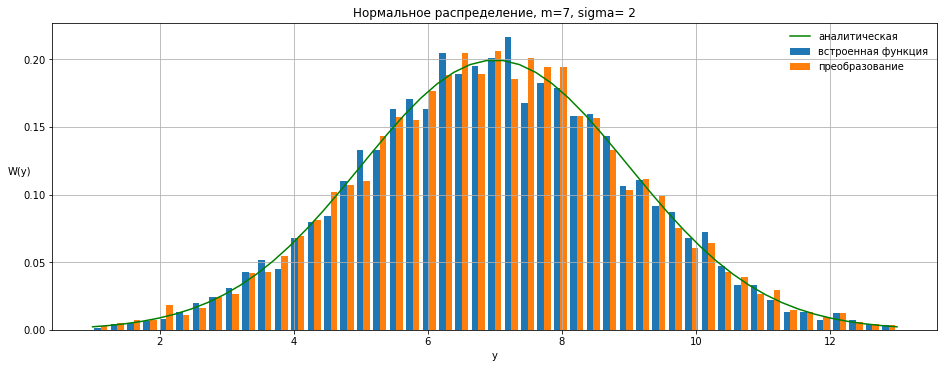

In [67]:
plt.figure(figsize = (13, 5), constrained_layout = True)

plt.plot(x_axis, w_analityc, 'g-', label = 'аналитическая')
plt.hist([y_lib, y_custom], density = True, bins = x_axis, label = ['встроенная функция','преобразование'])
plt.legend(loc = 'best', frameon = False)
plt.title('Нормальное распределение, m=' + str(mu_param) + ', sigma= ' + str(sigma_param))
plt.xlabel('y')
plt.ylabel('W(y)', rotation='horizontal')
plt.grid(1)
plt.show()

## 5. Вывод ПВ исходной равномерной СВ

In [68]:
n_edges = 40         # количество бинов в гистограмме 
x_axis_uniform = np.linspace(-1, 2, n_edges)
w_analityc_uniform = ((x_axis_uniform >= 0) & (x_axis_uniform <= 1)) * 1

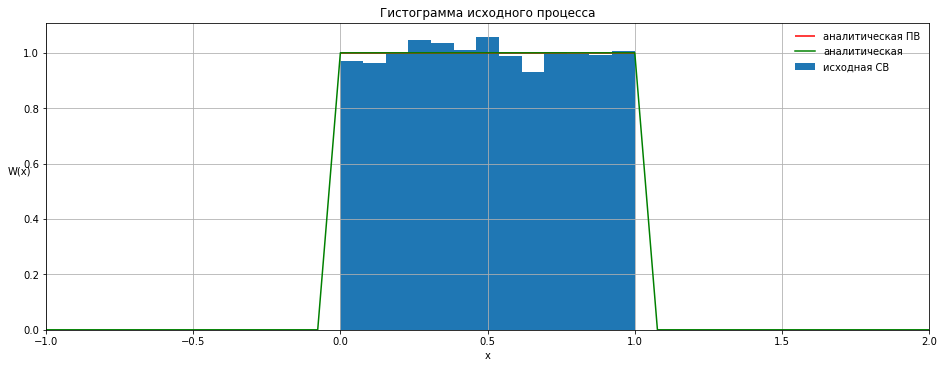

In [69]:
plt.figure(figsize = (13, 5), constrained_layout = True)

plt.hlines(1, 0, 1, color = 'r', label = 'аналитическая ПВ')
plt.plot(x_axis_uniform, w_analityc_uniform, 'g-', label = 'аналитическая')
plt.hist(x_1,density = True, bins = x_axis_uniform, label = 'исходная СВ')
plt.legend(loc = 'best', frameon = False)
plt.title('Гистограмма исходного процесса')
plt.xlabel('x')
plt.xlim((-1,2))
plt.ylabel('W(x)', rotation = 'horizontal')
plt.grid(1)
plt.show()

# Моделирование заданного распределения 

## 1. Моделирование на основе равномерного распределения

### 1.1 Распределение  Рэлея

In [279]:
n_edges = 50 
y_lib_rel = rayleigh.rvs(scale = sigma_param, size = n_values) # встроенная функция распределения Рэлея

In [280]:
x_1_rel = np.random.uniform(0, 1, size=n_values)      # исходная равномерная СВ  
y_1_rel = sigma_param * np.sqrt(-2*np.log(x_1_rel))   # результат н.лин. преобразования - Рэлеевская СВ

In [283]:
x_axis_rel = np.linspace(0, 5*sigma_param, n_edges)
w_analityc_rel = rayleigh.pdf(x_axis_rel, scale= sigma_param) # аналитическое значение СВ

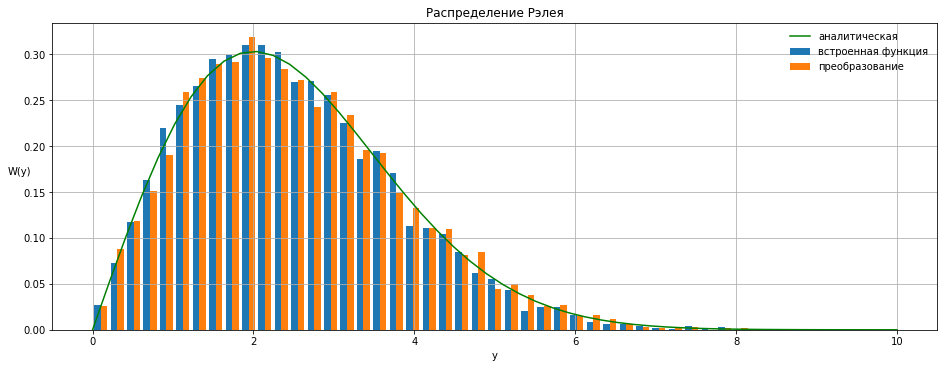

In [284]:
plt.figure(figsize = (13, 5), constrained_layout = True)

plt.plot(x_axis_rel, w_analityc_rel, 'g-', label = 'аналитическая')
plt.hist([y_lib_rel, y_1_rel], density = True, bins = x_axis_rel, label = ['встроенная функция','преобразование'])
plt.legend(loc = 'best', frameon = False)
plt.title('Распределение Рэлея')
plt.xlabel('y')
plt.ylabel('W(y)', rotation='horizontal')
plt.grid(1)
plt.show()

### 1.2 Распределение Райса

In [333]:
# P.S. При a = 0, распределение Райса == Рэлею
# При увеличении a распределение Райса стремится к нормальному распределению
n_edges = 50 
y_lib_riсe = rice.rvs(b = a/sigma_param, scale = sigma_param, size=n_values) # встроенная функция распределения Райса

In [334]:
x_1_rice = np.random.uniform(0, 1, size=n_values)      # исходная равномерная СВ 1
x_2_rice = np.random.uniform(0, 1, size=n_values)      # исходная равномерная СВ 2 
y_1_rice = a**2 - 2*(sigma_param**2)*np.log(x_1_rise)
y_2_rice = -2*a*sigma_param*np.sqrt(-2*np.log(x_1_rise))*np.cos(2*np.pi*x_2_rise)
y_riсe = np.sqrt(y_1_rice + y_2_rice)

In [343]:
x_axis_rice = np.linspace(0, 6*sigma_param, n_edges)
w_analityc_riсe = rice.pdf(x_axis_rice, b = a/sigma_param, scale = sigma_param) # аналитическое значение СВ

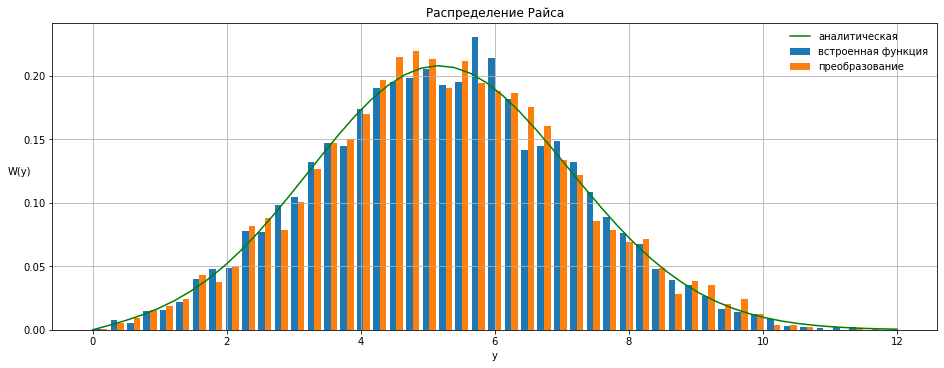

In [344]:
plt.figure(figsize = (13, 5), constrained_layout = True)

plt.plot(x_axis_rice, w_analityc_riсe, 'g-', label = 'аналитическая')
plt.hist([y_lib_riсe, y_riсe], density = True, bins = x_axis_rice, label = ['встроенная функция','преобразование'])
plt.legend(loc = 'best', frameon = False)
plt.title('Распределение Райса')
plt.xlabel('y')
plt.ylabel('W(y)', rotation='horizontal')
plt.grid(1)
plt.show()

### 1.3 Показательное распределение 

In [399]:
n_edges = 40 
y_lib_exp = expon.rvs(scale= 1/lambda0, size=n_values) # встроенная функция показательного распределения

In [400]:
x_1_exp = np.random.uniform(0, 1, size=n_values)      # исходная равномерная СВ  
y_1_exp = -np.log(x_1_exp)/lambda0                    # результат н.лин. преобразования - показательная СВ

In [401]:
x_axis_exp = np.linspace(0, 20*sigma_param, n_edges)
w_analityc_exp = expon.pdf(x_axis_exp, scale = 1/lambda0) # аналитическое значение СВ

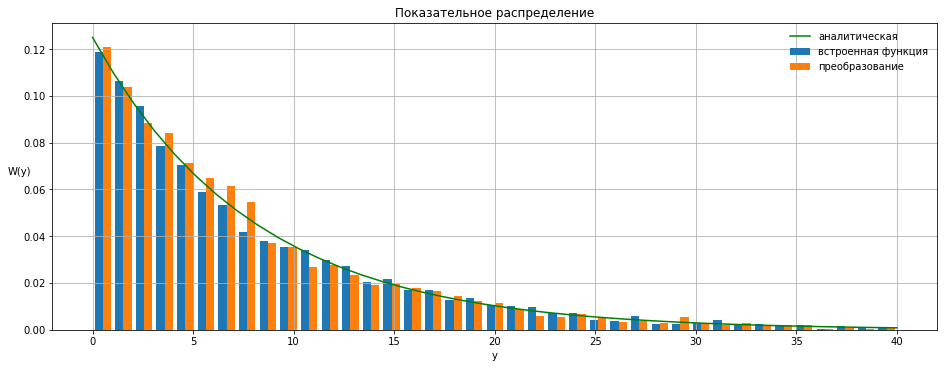

In [402]:
plt.figure(figsize = (13, 5), constrained_layout = True)

plt.plot(x_axis_exp, w_analityc_exp, 'g-', label = 'аналитическая')
plt.hist([y_lib_exp, y_1_exp], density = True, bins = x_axis_exp, label = ['встроенная функция','преобразование'])
plt.legend(loc = 'best', frameon = False)
plt.title('Показательное распределение')
plt.xlabel('y')
plt.ylabel('W(y)', rotation='horizontal')
plt.grid(1)
plt.show()

### 1.4 Арксинусное распределение

In [387]:
n_edges = 60 
y_lib_arcsin = arcsine.rvs(loc = -a, scale = 2*a, size=n_values) # встроенная функция арксинусного распределения

In [388]:
x_1_arcsin = np.random.uniform(0, 1, size=n_values)      # исходная равномерная СВ
y_1_arcsin = a * np.sin(2 * np.pi * x_1_arcsin)          # результат н.лин. преобразования - арксинусная СВ

In [389]:
x_axis_arcsin = np.linspace(-a, a, n_edges)
w_analityc_arcsin = arcsine.pdf(x_axis_arcsin, loc = -a, scale = 2*a) # аналитическое значение СВ

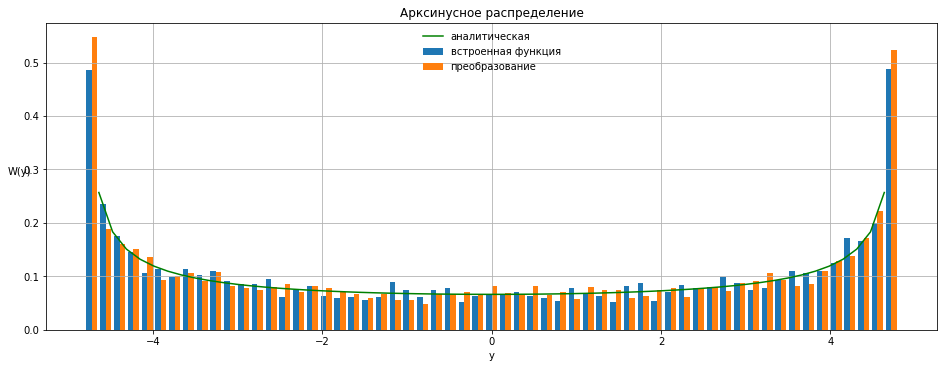

In [390]:
plt.figure(figsize = (13, 5), constrained_layout = True)

plt.plot(x_axis_arcsin, w_analityc_arcsin, 'g-', label = 'аналитическая')
plt.hist([y_lib_arcsin, y_1_arcsin], density = True, bins = x_axis_arcsin, label = ['встроенная функция','преобразование'])
plt.legend(loc = 'best', frameon = False)
plt.title('Арксинусное распределение')
plt.xlabel('y')
plt.ylabel('W(y)', rotation='horizontal')
plt.grid(1)
plt.show()

## 2. Моделирование на основе нормального распределения

### 2.1 Распределение  Рэлея

In [408]:
n_edges = 50 
y_lib_rel = rayleigh.rvs(scale = sigma_param, size = n_values) # встроенная функция распределения Рэлея

In [409]:
z_1_rel = np.random.normal(0, 1, size=n_values)            # исходная нормальная СВ  
z_2_rel = np.random.normal(0, 1, size=n_values)            # исходная нормальная СВ  
y_1_rel = sigma_param * np.sqrt(z_1_rel**2 + z_2_rel**2)   # результат н.лин. преобразования - Рэлеевская СВ

In [410]:
x_axis_rel = np.linspace(0, 5*sigma_param, n_edges)
w_analityc_rel = rayleigh.pdf(x_axis_rel, scale= sigma_param) # аналитическое значение СВ

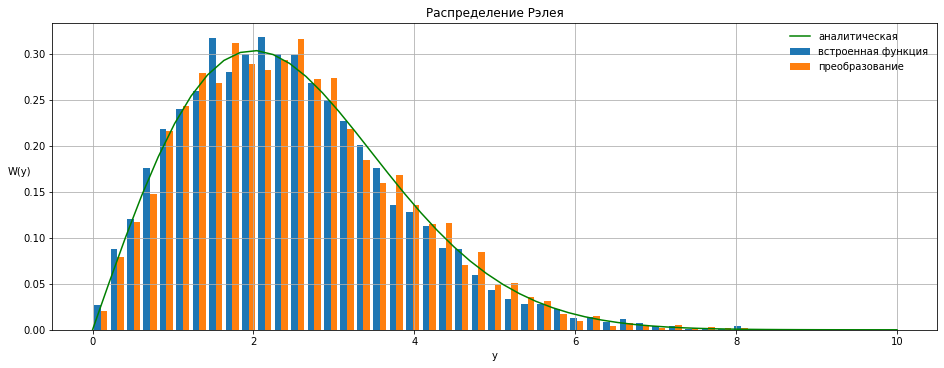

In [411]:
plt.figure(figsize = (13, 5), constrained_layout = True)

plt.plot(x_axis_rel, w_analityc_rel, 'g-', label = 'аналитическая')
plt.hist([y_lib_rel, y_1_rel], density = True, bins = x_axis_rel, label = ['встроенная функция','преобразование'])
plt.legend(loc = 'best', frameon = False)
plt.title('Распределение Рэлея')
plt.xlabel('y')
plt.ylabel('W(y)', rotation='horizontal')
plt.grid(1)
plt.show()

### 2.2 Распределение Райса

In [438]:
# P.S. При a = 0, распределение Райса == Рэлею
# При увеличении a распределение Райса стремится к нормальному распределению
n_edges = 50 
y_lib_riсe = rice.rvs(b = a/sigma_param, scale = sigma_param, size=n_values) # встроенная функция распределения Райса

In [439]:
z_1_rice = np.random.normal(0, sigma_param, size=n_values)           # исходная нормальная СВ 1
z_2_rice = np.random.normal(0, sigma_param, size=n_values)           # исходная нормальная СВ 2 
y_riсe = np.sqrt((z_1_rice+a)**2 + z_2_rice**2)                      # результат н.лин. преобразования - Райсовская СВ

In [440]:
x_axis_rice = np.linspace(0, 6*sigma_param, n_edges)
w_analityc_riсe = rice.pdf(x_axis_rice, b = a/sigma_param, scale = sigma_param) # аналитическое значение СВ

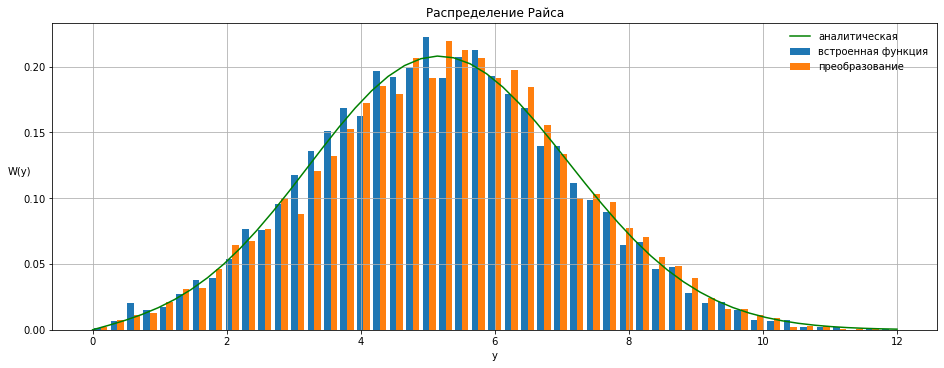

In [441]:
plt.figure(figsize = (13, 5), constrained_layout = True)

plt.plot(x_axis_rice, w_analityc_riсe, 'g-', label = 'аналитическая')
plt.hist([y_lib_riсe, y_riсe], density = True, bins = x_axis_rice, label = ['встроенная функция','преобразование'])
plt.legend(loc = 'best', frameon = False)
plt.title('Распределение Райса')
plt.xlabel('y')
plt.ylabel('W(y)', rotation='horizontal')
plt.grid(1)
plt.show()

### 2.3 Показательное распределение

In [452]:
n_edges = 40 
y_lib_exp = expon.rvs(scale= 1/lambda0, size=n_values) # встроенная функция показательного распределения

In [453]:
z_1_exp = np.random.normal(0, 1, size=n_values)       # исходная нормальная СВ  
z_2_exp = np.random.normal(0, 1, size=n_values)       # исходная нормальная СВ 
y_1_exp = (z_1_exp**2 + z_2_exp**2)/(2*lambda0)       # результат н.лин. преобразования - показательная СВ

In [454]:
x_axis_exp = np.linspace(0, 20*sigma_param, n_edges)
w_analityc_exp = expon.pdf(x_axis_exp, scale = 1/lambda0) # аналитическое значение СВ

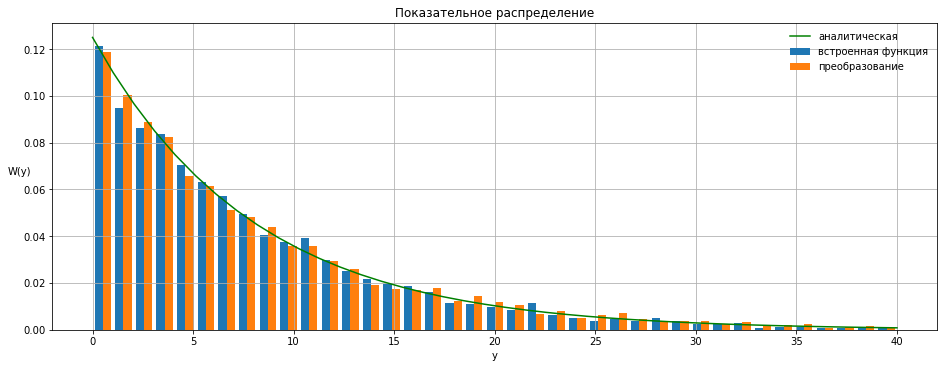

In [455]:
plt.figure(figsize = (13, 5), constrained_layout = True)

plt.plot(x_axis_exp, w_analityc_exp, 'g-', label = 'аналитическая')
plt.hist([y_lib_exp, y_1_exp], density = True, bins = x_axis_exp, label = ['встроенная функция','преобразование'])
plt.legend(loc = 'best', frameon = False)
plt.title('Показательное распределение')
plt.xlabel('y')
plt.ylabel('W(y)', rotation='horizontal')
plt.grid(1)
plt.show()

### 2.4 Хи-квадрат распределение

In [484]:
n_edges = 40 
df_param = 24
y_lib_chi2 = chi2.rvs(df = df_param, size=n_values) # встроенная функция показательного распределения

In [485]:
y_chi2 = np.zeros(n_values)
for i in range(df_param):
    y_chi2 = y_chi2 + ((np.random.normal(0, 1, size=n_values))**2)

In [488]:
x_axis_chi2 = np.linspace(0, 25*sigma_param, n_edges)
w_analityc_chi2 = chi2.pdf(x_axis_chi2, df = 24) # аналитическое значение СВ

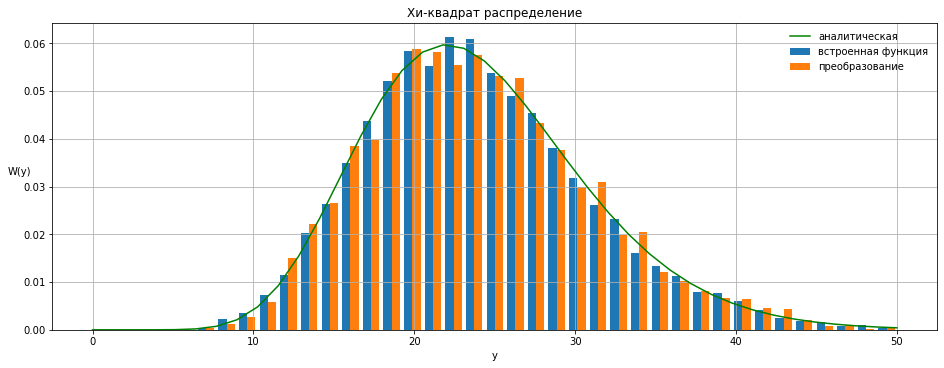

In [489]:
plt.figure(figsize = (13, 5), constrained_layout = True)

plt.plot(x_axis_chi2, w_analityc_chi2, 'g-', label = 'аналитическая')
plt.hist([y_lib_chi2, y_chi2], density = True, bins = x_axis_chi2, label = ['встроенная функция','преобразование'])
plt.legend(loc = 'best', frameon = False)
plt.title('Хи-квадрат распределение')
plt.xlabel('y')
plt.ylabel('W(y)', rotation='horizontal')
plt.grid(1)
plt.show()